# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 3

## Business Understanding - 10pts

Traffic accidents impact many of us in our daily lives. From being delayed due to an accident to being in an accident ourselves, anytime we are travelling there is a concern that a traffic accident could impact us. The US Accidents dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

This data could be leveraged for multiple purposes:

- Alerting drivers to when an accident may occur
- Providing insurance companies information on accident fequencies
- Assisting government agencies in future traffic pattern design and planning

A good prediction algorithm for this data would establish a relationship between the factors in this data file, such as weather, time of day, location, and the severity of an accidents occurrence. We would know if the algorithm was useful if it could successfully predict how severe an accident would be based on those variables. In knowing the severity, we could recommend to civic institutions how, where, and when to allocate the most resources for accidents. 

## Data Understanding - 10pts

Setup initial requirements for the data analysis prior to EDA. This is for cleanliness of the code base and consistency of outputs.

In [2]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib as pathlib
import math

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble
from sklearn import mixture
from matplotlib.image import imread
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

#The packages below will need to be installed for use.
# sorted_months_weekdays allows for easier manipulation of date fields
from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week
import swifter

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

#set variables for font sizes for plots. This will allow them to be consistent within the notebook
titleFont = 25
axisFont = 15
labelFont = 15

F:\Anaconda\envs\ML7331\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Now we'll load our EDA from previous discovery into this notebook. As with other analysis we also selected the state of Texas as our primary state of interest for this analysis. We chose a single state because we felt that traffic accidents and patterns can vary heavily from state to state; some states have longer streches of rural driving vs others that may have more city driving. As a result, the potential features related to accident severity and backups created from those accidents could vary widely. We chose Texas to focus our analysis on because we felt it has a good mix of rural and urban driving conditions.

Over the course of the EDA the data has been reshaped to allow for easier analysis. A quick reference of those reshaping items is listed as follows:

- Creation of a new feature called Weather Condition Collapsed. Upon further review of the Weather Condition feature there were data inconsistences in the data that needed to be addressed. For example, a weather condition may be listed as 'Thunderstorm' or 'T-Storm'. These are in effect the same condition. To alleviate this inconsistency the data was re-mapped to ensure these were removed. 

- One-hot encoding of the features: State, Start_Month, Start_Day, Sunrise_Sunset, Side, Weather_Condition_Collapsed, TMC

- Removal of columns that contained little or inconsistent data: Wind_Direction, Source, Description, ZipCode, Weather Timestamp

- Removal of columns that could possibly result in data leakage in further analysis: TMC

- Removal of columns that were duplicative: Civil_Twilight, Nautical_Twilight, Astronomical_Twilight

- New variables were created to break down each accident start date/time and end date/time into components

- New variables were created to build out an accident duration variable to describe the length of time of the accident

- Missing values for weather variables (Wind Chill, Precipitation, Visibility, Humidity, Temperature, Pressure, Wind_Speed) were imputed based on the specific month of the year. This was performed to ensure the median's of thee values were as close to accurate as possible.

Specific to this analysis we also build out two different versions of the data frames. The first with all accident severity variable components in their 1-4 categorization and a second with the accident severity variables grouped into high and low severity.

Initial Shape:  (2974335, 49)
Deduplication Shape:  (2974335, 49)
No Duplicate Data Found


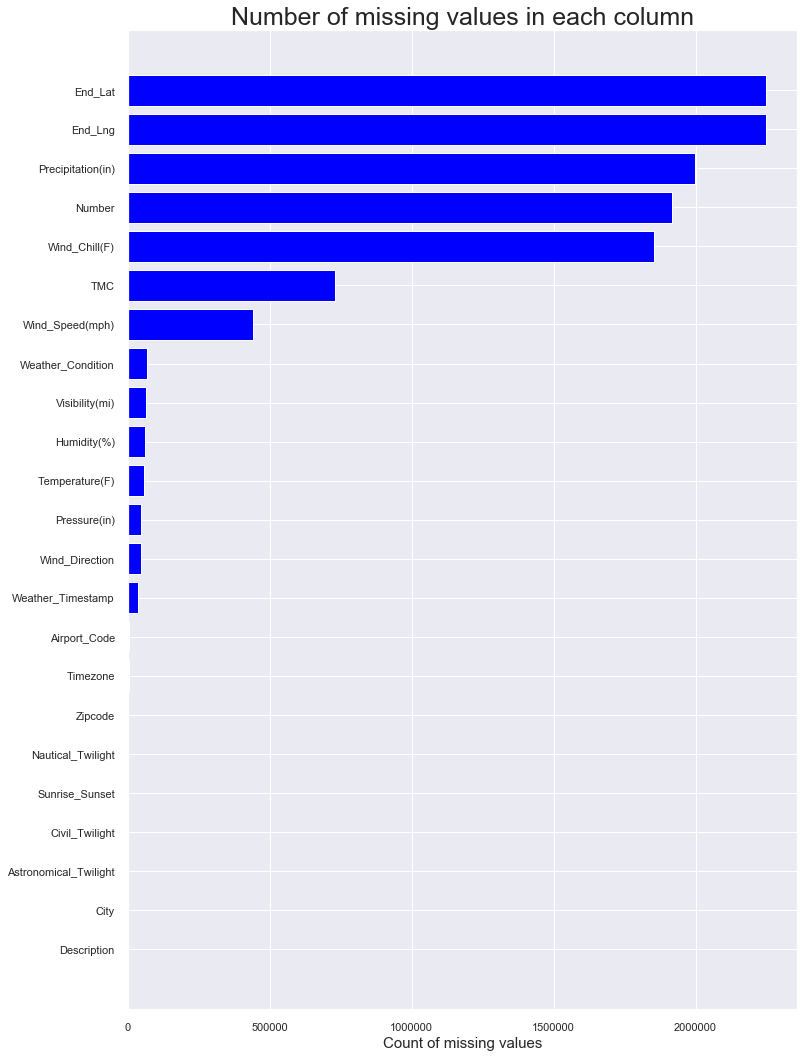

['MapQuest' 'MapQuest-Bing' 'Bing']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'W' 'NNW' 'NNE' 'S' 'N' 'VAR' 'SE'
 'SSE' 'ESE' 'E' 'NE' 'ENE' nan 'CALM']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974313 entries, 0 to 2974334
Data columns (total 62 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 float64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State              

['Rainy' 'Cloudy' 'Snowy' 'Fog' 'Clear' 'Icy' nan 'Smoke' 'Ash'
 'Sand/Windy' 'Dust/Windy' 'Dust' 'Clear/Windy' 'Cloudy/Windy'
 'Rain/Windy' 'Tornado' 'Rain/Snow' 'Snow' 'Sand' 'Snow/Windy' 'Rain'
 'Icy/Snow' 'Icy/Windy' 'Fog/Windy' 'Smoke/Windy']



(298058, 50)
ID                                     object
Severity                              float64
Start_Time                     datetime64[ns]
End_Time                       datetime64[ns]
Start_Lat                             float64
Start_Lng                             float64
Distance(mi)                          float64
Side                                   object
City                                   object
County                                 object
Zipcode                                object
Country                                object
Timezone                               object
Airport_Code                           object
Temperature(F)                        float64
Wind_Chill(F)                         float64
Humidity(%)                           float64
Pressure(in)                          float64
Visibility(mi)                        float64
Wind_Direction                         object
Wind_Speed(mph)                       float64
Precipitation(in)   

In [3]:
#Run the initial EDA from the first lab for the project. 
%run ./JB_AR_BC_SO_Project_3_EDA.ipynb

Verify that everything loaded as expected:
- Our initial cleaned dataframe with all features (df)
- Our featured dataframe with all severities (df_ungroupedSev)
- Our featured dataframe with collapsed severities (df_groupedSev)

In [4]:
print("df shape: ", df.shape)
print("df_ungroupedSev: ", df_ungroupedSev.shape)
print("df_groupedSev: ", df_groupedSev.shape)

df shape:  (290989, 50)
df_ungroupedSev:  (290989, 67)
df_groupedSev:  (290989, 67)


## Modeling and Evaluation - 50pts

In this section we will demonstrate and evaluate various clustering methods on the data set. We will use K-Means clustering, Gaussian clustering and DBSCAN to evaluate the clusters in the data. From these clusters we will identify cluster attributes and provide evaluation across the various clustering methodologies.

### K-Means Clustering

The first clustering method will be K-Means. We'll start by building out the initial feature set for the model to use.

In [5]:
featuresList = ['Start_Lat','Start_Lng','Side','Temperature(F)',
                'Humidity(%)','Visibility(mi)','Precipitation(in)',
                'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']

#filter down the dataframe to just the features needed. We'll create a new dataframe just to be safe
df2 = df[featuresList]

# transform categories into dummy numerics
cols_to_transform = ['Side','Sunrise_Sunset']

df2 = pd.get_dummies(df2, columns = cols_to_transform)

#check to make sure everything transformed
df2.dtypes

Start_Lat               float64
Start_Lng               float64
Temperature(F)          float64
Humidity(%)             float64
Visibility(mi)          float64
Precipitation(in)       float64
PointOfInterest         float64
Bump                    float64
Crossing                float64
Yield                   float64
Junction                float64
No_Exit                 float64
Railway                 float64
Roundabout              float64
Station                 float64
Stop                    float64
Traffic_Calming         float64
Traffic_Signal          float64
Turning_Loop            float64
Side_L                    uint8
Side_R                    uint8
Sunrise_Sunset_Day        uint8
Sunrise_Sunset_Night      uint8
dtype: object

In this step, we apply standard scaling to our data for use in identifying the optimal number of clusters as a target for our clustering approaches.

In [6]:
# Apply scaling to the data

ss = StandardScaler()
X = ss.fit_transform(df2)

Here we will visualize the entire dataset to look at the original shape

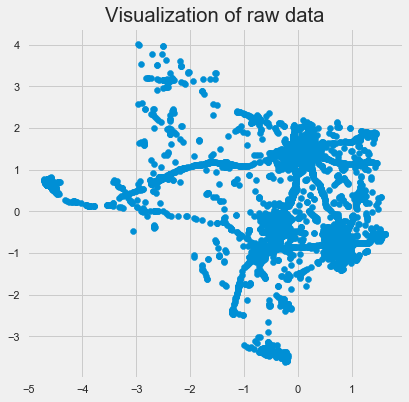

In [7]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.scatter(X[:, 1], X[:,0])
plt.title('Visualization of raw data');

Since we are using accident data for Texas you can see in the visualization above that most of the data is around major cities and highways.

Looking at just 2 clusters to see what the distribution of data looks like

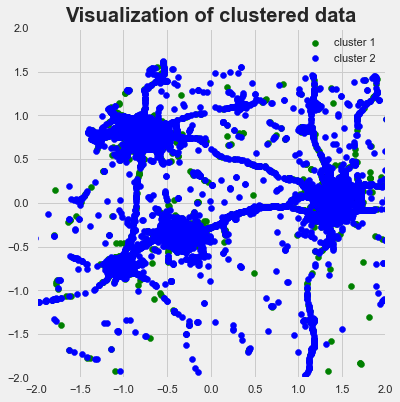

In [8]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X)
y_pred = kmeans.predict(X)
pred_labels = kmeans.labels_


# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[pred_labels == 0, 0], X[pred_labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[pred_labels == 1, 0], X[pred_labels == 1, 1],
            c='blue', label='cluster 2')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

Again similar to the raw data visualization above this one with just 2 clusters shows that majority of the data falls in cluster 1 because of population density and number of cars on the road, however there are some with cluster 2 but they are not as close together as cluster 1, We will do further analysis below to look into more clusters.

Now we will leverage the elbow method plot to identify the optimal number of clusters for this dataset. As a sanity check we'll look at both a non-scaled and scaled plot. We'll do both plot types, even though they are redundant, to see if one makes it easier to determine number of clusters. 

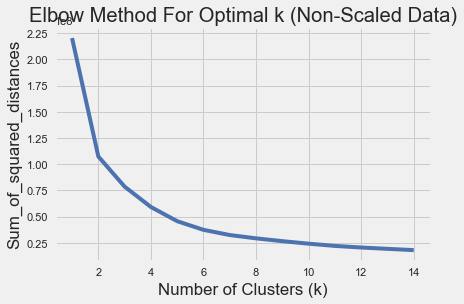

In [9]:
# Create elbow plot for sanity check on number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot the appropriate k cluster size
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Non-Scaled Data)')
plt.show()

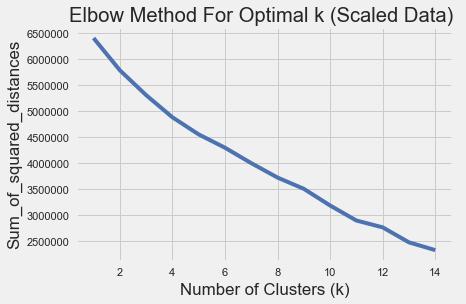

In [10]:
# Create elbow plot for sanity check on number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot the appropriate k cluster size
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Scaled Data) ')
plt.show()

Based on the output of the plots, the optimal number of clusters appears to be around 7 or 8.  Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.  We will use 8 moving forward for the K Means Clustering

Number of clusters: 8


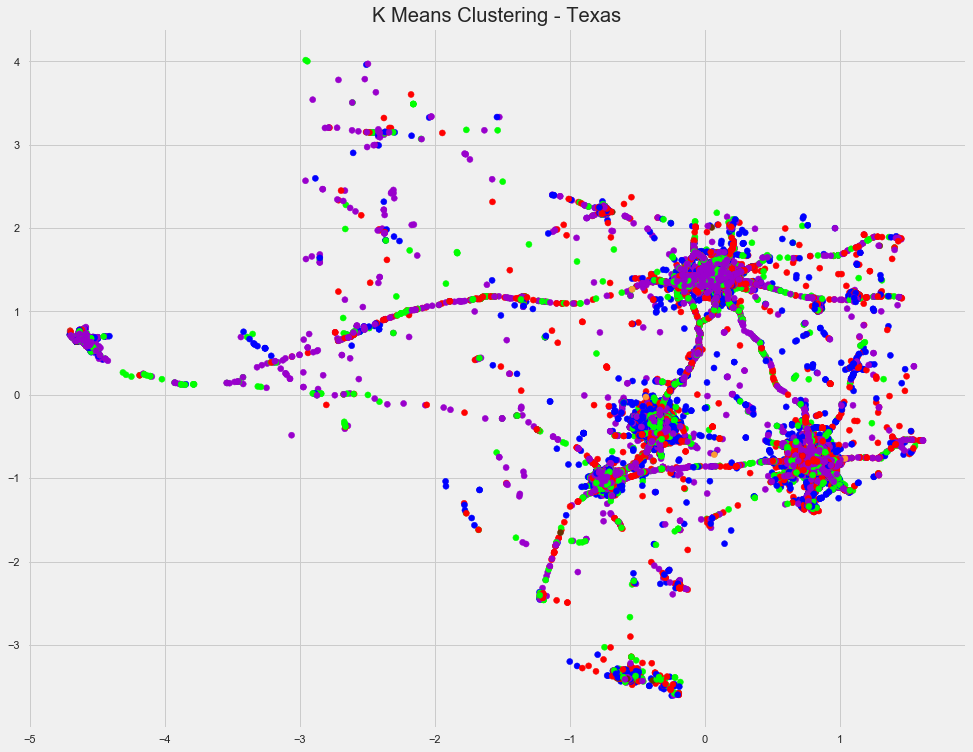

In [11]:
# KMeans Clustering with 8 clusters
kmeans = KMeans(n_clusters=8, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X)
y_pred = kmeans.predict(X)
pred_labels = kmeans.labels_

colors = ['#9900cc', '#0000ff', '#00ff00', '#ff9933', '#ff0000', '#ff99cc', '#663300', '#A0A0A0','royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.figure(figsize=(15,12))
plt.scatter(X[:, 1], X[:,0],
            c=vectorizer(pred_labels))
plt.title("K Means Clustering - Texas")

kmeans_labels = kmeans.labels_
num_clusters = len(set(kmeans_labels))
print('Number of clusters: %d' % num_clusters)

samples_w_lbls = np.concatenate((X,pred_labels[:,np.newaxis]),axis=1)
filter = np.asarray([5])
res = samples_w_lbls[np.in1d(samples_w_lbls[:,-1], filter)]

In [12]:
# Append clusters back to dataset
df3 = df2.copy()
df3["cluster"] = pred_labels

# Check clusters

cluster0_cnt = len(df3[pred_labels == 0])
cluster1_cnt = len(df3[pred_labels == 1])
cluster2_cnt = len(df3[pred_labels == 2])
cluster3_cnt = len(df3[pred_labels == 3])
cluster4_cnt = len(df3[pred_labels == 4])
cluster5_cnt = len(df3[pred_labels == 5])
cluster6_cnt = len(df3[pred_labels == 6])
cluster7_cnt = len(df3[pred_labels == 7])
#cluster8_cnt = len(df3[pred_labels == 8])
cluster0_per = round(len(df3[pred_labels == 0])/len(df3),2)
cluster1_per = round(len(df3[pred_labels == 1])/len(df3),2)
cluster2_per = round(len(df3[pred_labels == 2])/len(df3),2)
cluster3_per = round(len(df3[pred_labels == 3])/len(df3),2)
cluster4_per = round(len(df3[pred_labels == 4])/len(df3),2)
cluster5_per = round(len(df3[pred_labels == 5])/len(df3),2)
cluster6_per = round(len(df3[pred_labels == 6])/len(df3),2)
cluster7_per = round(len(df3[pred_labels == 7])/len(df3),2)
clusterAll_per = (round(cluster0_per + cluster1_per + cluster2_per + cluster3_per + cluster4_per + cluster5_per + cluster6_per + cluster7_per )) * 100
    
clusterAll_cnt = cluster0_cnt + cluster1_cnt + cluster2_cnt + cluster3_cnt + cluster4_cnt + cluster5_cnt + cluster6_cnt + cluster7_cnt

print("Cluster 0:", cluster0_cnt, "rows, ", cluster0_per, "percent of total")
print("Cluster 1:", cluster1_cnt, "rows, ", cluster1_per, "percent of total")
print("Cluster 2:", cluster2_cnt, "rows, ", cluster2_per, "percent of total")
print("Cluster 3:", cluster3_cnt, "rows, ", cluster3_per, "percent of total")
print("Cluster 4:", cluster4_cnt, "rows, ", cluster4_per, "percent of total")
print("Cluster 5:", cluster5_cnt, "rows, ", cluster5_per, "percent of total")
print("Cluster 6:", cluster6_cnt, "rows, ", cluster6_per, "percent of total")
print("Cluster 7:", cluster7_cnt, "rows, ", cluster7_per, "percent of total")


print("Total check", clusterAll_cnt, "rows,", clusterAll_per, "percent of total")

Cluster 0: 102597 rows,  0.35 percent of total
Cluster 1: 61534 rows,  0.21 percent of total
Cluster 2: 52904 rows,  0.18 percent of total
Cluster 3: 1642 rows,  0.01 percent of total
Cluster 4: 69555 rows,  0.24 percent of total
Cluster 5: 11 rows,  0.0 percent of total
Cluster 6: 2694 rows,  0.01 percent of total
Cluster 7: 52 rows,  0.0 percent of total
Total check 290989 rows, 100 percent of total


In [13]:
# Create cluster dataframes
cluster0 = df3[pred_labels == 0]
cluster1 = df3[pred_labels == 1]
cluster2 = df3[pred_labels == 2]
cluster3 = df3[pred_labels == 3]
cluster4 = df3[pred_labels == 4]
cluster5 = df3[pred_labels == 5]
cluster6 = df3[pred_labels == 6]
cluster7 = df3[pred_labels == 7]

Text(0.5, 1.0, 'Cluster Group 7')

<Figure size 432x288 with 0 Axes>

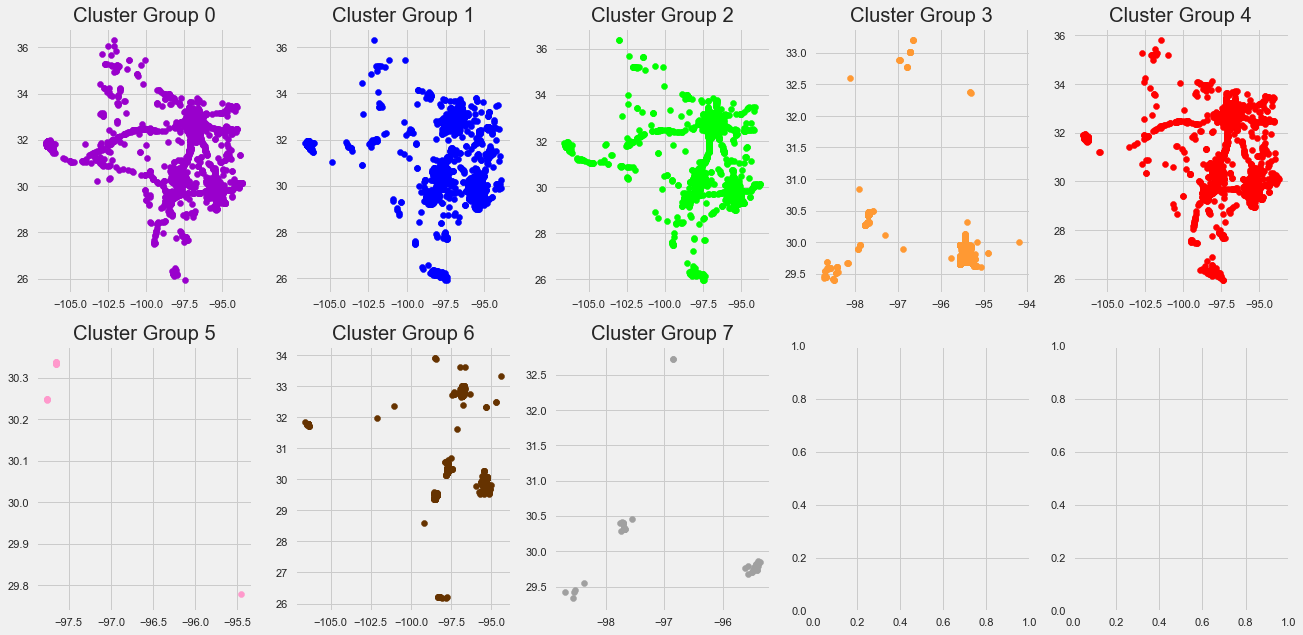

In [14]:
# Create individual cluster plots
fig = plt.figure()    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# row 1
axes[0,0].scatter(cluster0.iloc[:, 1], cluster0.iloc[:,0], c='#9900cc')
axes[0,0].set_title("Cluster Group 0")

axes[0,1].scatter(cluster1.iloc[:, 1], cluster1.iloc[:,0], c='#0000ff')
axes[0,1].set_title("Cluster Group 1")

axes[0,2].scatter(cluster2.iloc[:, 1], cluster2.iloc[:,0], c='#00ff00')
axes[0,2].set_title("Cluster Group 2")

axes[0,3].scatter(cluster3.iloc[:, 1], cluster3.iloc[:,0], c='#ff9933')
axes[0,3].set_title("Cluster Group 3")

axes[0,4].scatter(cluster4.iloc[:, 1], cluster4.iloc[:,0], c='#ff0000')
axes[0,4].set_title("Cluster Group 4")

# row 2
axes[1,0].scatter(cluster5.iloc[:, 1], cluster5.iloc[:,0], c='#ff99cc')
axes[1,0].set_title("Cluster Group 5")

axes[1,1].scatter(cluster6.iloc[:, 1], cluster6.iloc[:,0], c='#663300')
axes[1,1].set_title("Cluster Group 6")

axes[1,2].scatter(cluster7.iloc[:, 1], cluster7.iloc[:,0], c='#A0A0A0')
axes[1,2].set_title("Cluster Group 7")

### K-Means Results

K Means Clustering created 8 clusterings of Texas accidents.We found 3 meaningful classifications based on those clusters:
    
*Cluster Group 0 and 4* - Highway Accidents and Suburban Accidents

*Cluster Group 2* - Urban Accidents

*Cluster Group 1.3,5,6,7* - Rural Accidents.

### K-Means Cluster Group Explanation

#### Cluster Group 0 and 4 - Highway Accidents and Suburban Accidents

The clustering data shows that 22% of the accidents are clustered into Group 0 and 18% of the accidents are clustered into Group 4. We can categorize this cluster as follows:

Occur along major highways and suburban areas with high population density.
Higher average severity.
Does not occur near traffic signals or crossings, but does occur near junctions.

Thus we can conclude that these are Highway Accidents and in busy suburban areas, occuring on the highway and busy roads or where junctions occur. These are marginally more severe than other accidents.


#### Clustering Groups 2 - Urban Accidents

Groups 2 account for 37% of accidents. We can categorize this cluster group as follows:

Occur in downtown and urban areas
High frequency of nearby crossings and traffic signals
We can classify these as Urban Accidents due to their locations and road characteristics.


#### Cluster Groups 1.3,5,6,7 - Rural Accidents

This group is very small compared to the others and only accounting for <1% of Texas accidents. These clusters may not be meaningful, but we can see that most of these are not in major metro areas or along highways so these are just normal accidents happening in small rural cities in Texas.


## Gaussian Mixed Model Clustering

### Overview

This method of clustering will use the Gaussian Mixed Model (GMM) approach. This approach is useful for data that can be represented by Gaussian distributions. We will be using continuous and binary variables normalized in our clustering. Additionally, we will allow a full covariance matrix to be calculated in order to capture the shape of our data the best. 

We will be clustering on over 20 variables so we will not be able to visualize every variable's shape with respect to all others. Instead, we will examine where the clusters occur in the state of Texas.

We chose the variables included based off of variables we found to be important in modeling severity, which itself is an important indicator of whether or not an accident requires top priority of resources and responders. These variables include both weather data and road characteristics, such as the presence of intersections.

In [15]:
df2 = df_ungroupedSev[['Start_Time','Severity', 'Start_Lat','Start_Lng','Temperature(F)','Humidity(%)','Visibility(mi)',
                      'Precipitation(in)','PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                      'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop',
                      'Sunrise_Sunset_Day','Sunrise_Sunset_Night']]

df2 = df2.sort_values("Start_Time")

df2['Start_Month']=df2['Start_Time'].apply(lambda x : str(x))

df2[['Start_Month'] ]= df2[["Start_Month"]].apply(lambda x : x.str[5:7])
df2.head()

,Start_Time,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Month
300353,2016-06-14 20:06:43,2.0,32.860638,-96.719559,90.0,57.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,06
300352,2016-06-14 20:17:03,2.0,30.335411,-97.703049,89.1,61.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,06
300356,2016-06-14 20:21:49,2.0,29.757492,-95.365791,86.0,66.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,06
300355,2016-06-14 20:26:55,2.0,29.821486,-95.368080,84.2,70.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,06
300354,2016-06-14 20:49:39,2.0,32.871536,-96.683105,88.0,61.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,06


In [16]:
drop_cols = ['index','Severity']

### Determining Number of Clusters

While ideally we would like to create 4 clusters to improve upon the 4 designations of severity already implemented, we will iterate over the number of clusters to see how many clusters are optimal. We will look at BIC as it is a useful metric in comparing models, as we will compare the models by number of clusters to decide which is best. We would also like to keep the number of clusters as low as possible in order to have meaningful traffic impact with each cluster.

As shown in the graph below, the elbow of the BIC curve occurs around 8 clusters. We will create 8 clusters to describe traffic accidents using GMM.

In [17]:
n_components = np.arange(2,20,step=2)

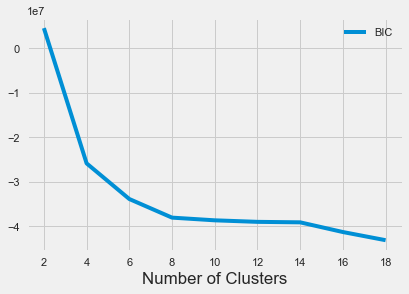

In [18]:
train0 = df2.drop(columns=['Start_Time'])
train0.reset_index(level=0, inplace=True)
train0.head()

scl_obj = StandardScaler()
scl_obj.fit(train0) 
train_fit = scl_obj.transform(train0)

train = pd.DataFrame(data=train_fit, columns=train0.columns)

models = [mixture.GaussianMixture(n, covariance_type='full', random_state=123).fit(train.drop(columns=drop_cols))
          for n in n_components]

plt.plot(n_components, [m.bic(train.drop(columns=drop_cols)) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('Number of Clusters');

In [19]:
def modeling_GMM(train0, n_clusters, drop_cols) :
    # Prep incoming data
    train0.reset_index(level=0, inplace=True)
    
    scl_obj = StandardScaler()
    scl_obj.fit(train0) 
    train_fit = scl_obj.transform(train0)
    
    # Initialize Gaussian Mixture
    GM = mixture.GaussianMixture(n_components=n_clusters,
                                 covariance_type='full',
                                 random_state=123,
                                 verbose=1)
    
    # Fit clusters
    gmm = GM.fit(train.drop(columns=drop_cols))
    
    # Get cluster labels
    labels = gmm.predict(train.drop(columns=drop_cols))
    
    # Get cluster probabilities
    prob = gmm.predict_proba(train.drop(columns=drop_cols))
    
    # Join cluster labels
    train2 = train.join(pd.DataFrame(data=labels, columns=['cluster']), how='left')
    
    # Join cluster probabilities
    prob_col_list = ['cluster'+str(n) for n in range(prob.shape[1]) ]
    train2 = train2.join(pd.DataFrame(data=prob, columns=prob_col_list), how='left')
    
    return train2

In [20]:
num_clusters = 8

In [21]:
train_in = df2.drop(columns=['Start_Time'])

train_out = modeling_GMM(train_in, n_clusters=num_clusters, drop_cols=drop_cols)

train2 = train_in.join(pd.DataFrame(data=train_out, columns=['cluster']), how='left')

Initialization 0
Initialization converged: True


In [22]:
cluster_pct=train2['cluster'].value_counts(normalize=True)
cluster_pct_df=pd.DataFrame(cluster_pct)
cluster_pct_df.sort_index(inplace=True)
cluster_pct_dict=cluster_pct_df.T.to_dict("list")

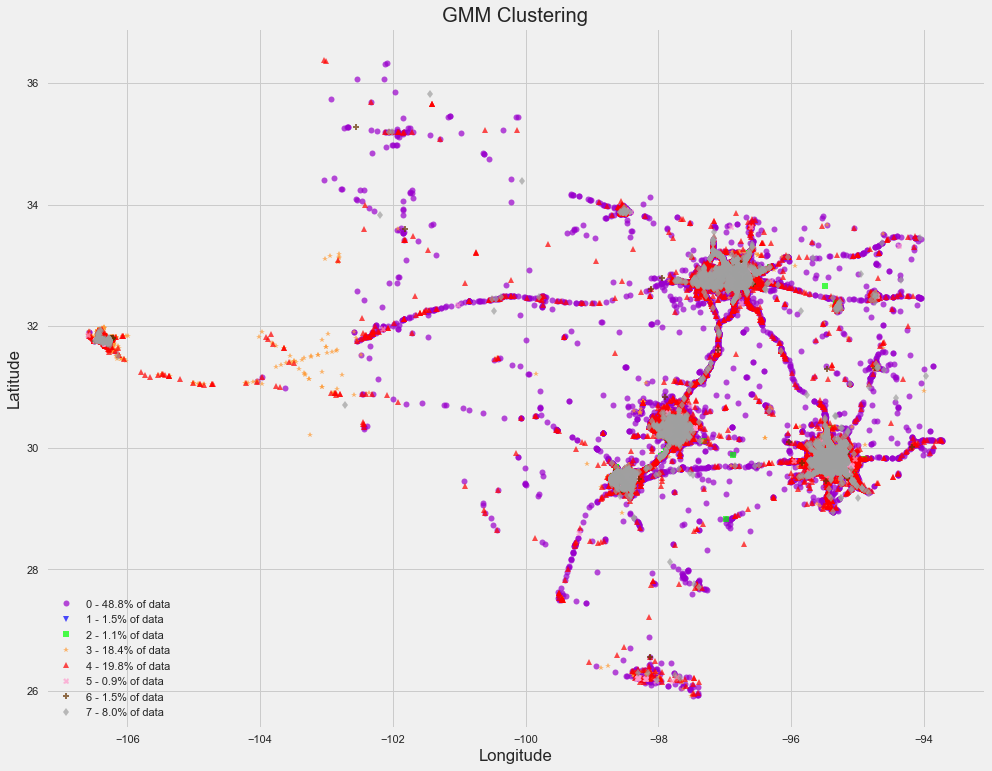

In [23]:
groups = train2.groupby("cluster")
markers = {0:'o', 1: 'v', 2: 's', 3: '*', 4:'^', 5:'X', 6:'P', 7:'d'}
colors = {0:'#9900cc', 1: '#0000ff', 2: '#00ff00', 3: '#ff9933', 4:'#ff0000', 5:'#ff99cc', 6:'#663300', 7:'#A0A0A0'}
plt.figure(figsize=(15,12))
for name, group in groups:
    label=str(name)+' - '+ str(round(cluster_pct_dict[name][0]*100,1))+'% of data'
    
    plt.plot(group["Start_Lng"], group["Start_Lat"], 
             marker=markers[name], 
             linestyle="", 
             label=label,
             c=colors[name], 
             alpha=.7)

plt.legend(loc=3)
plt.title('GMM Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 432x288 with 0 Axes>

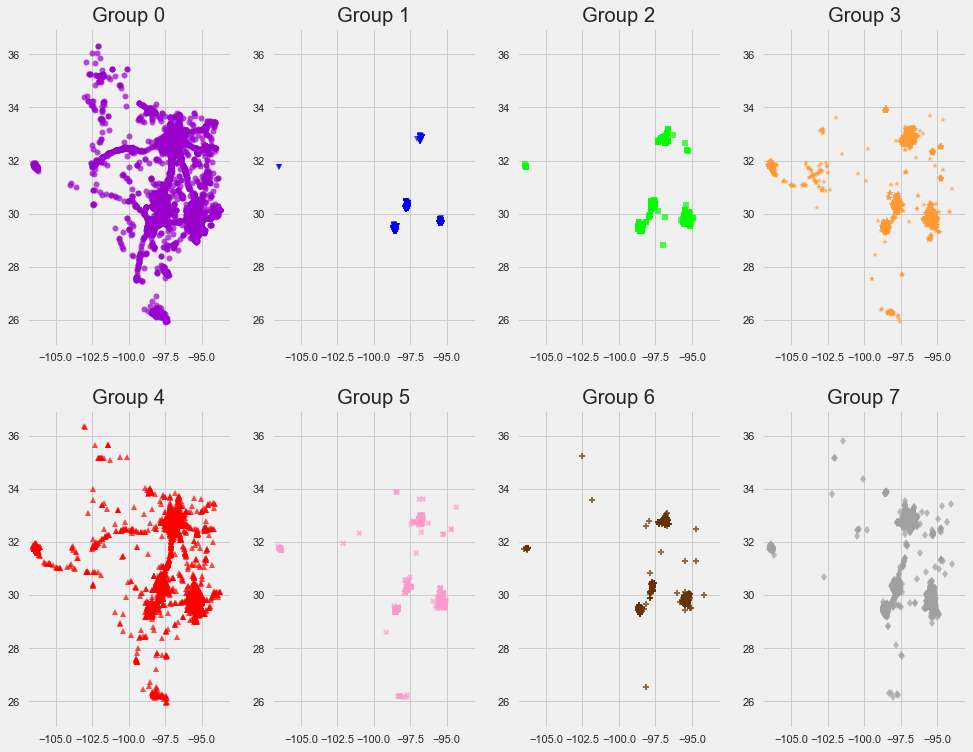

In [24]:
fig=plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,12))

x_axis = {0:0, 1:0, 2:0, 3:0, 4:1, 5:1, 6:1, 7:1}
y_axis = {0:0, 1:1, 2:2, 3:3, 4:0, 5:1, 6:2, 7:3}

for name, group in groups:
    
    y=y_axis[name]
    x=x_axis[name]
    
    axes[x,y].plot(group["Start_Lng"], group["Start_Lat"], 
             marker=markers[name], 
             linestyle="", 
             label=label,
             c=colors[name], 
             alpha=.7)
    
    axes[x,y].set_title("Group "+str(name))
    axes[x,y].set_xlim(-107,-93)
    axes[x,y].set_ylim(25,37)

In [25]:
means=groups.mean()
counts=groups.count()

In [26]:
means[['index']] = counts[['index']]
means = means.rename(columns={'index':'count'})
means = means[['count', 'Severity', 'Start_Lat', 'Start_Lng',
       'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)',
       'PointOfInterest', 'Bump', 'Crossing', 'Yield', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night']]

means

,count,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset_Day,Sunrise_Sunset_Night
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,142093,2.350059,30.927280,-96.744583,73.483342,61.990591,9.339606,0.001712,0.000000,0.000000,0.000000,0.000000,0.071024,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
1,4380,2.013927,30.216335,-97.455017,74.141621,60.545434,9.337995,0.006308,0.513242,0.000000,0.197489,0.000000,0.000457,0.000000,0.0,0.000000,1.000000,0.000000,0.004795,0.636986,0.0,0.826027,0.173973
2,3205,2.240874,30.299650,-96.313419,71.492793,66.550702,9.109407,0.008415,0.407488,0.012168,0.607488,0.494228,0.019345,0.083931,0.0,0.000000,0.000000,0.000000,0.023401,0.686427,0.0,0.683619,0.316381
3,53455,2.108372,30.650551,-98.199137,73.856709,57.416182,9.372394,0.001550,0.031092,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.888579,0.0,1.000000,0.000000
4,57720,2.388964,31.026329,-96.884699,63.696143,72.804037,9.236434,0.002135,0.000000,0.000000,0.000000,0.000000,0.067533,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.213877,0.0,0.000000,1.000000
5,2702,2.051443,30.494446,-96.187485,71.275833,65.715766,9.031421,0.005359,0.039230,0.000000,0.979645,0.002961,0.008882,0.001480,1.0,0.000000,0.053294,0.017765,0.000000,0.736491,0.0,0.801628,0.198372
6,4290,2.024709,29.990678,-95.875775,71.889254,67.031935,8.877669,0.005408,0.035897,0.003030,0.244056,0.011655,0.002331,0.006294,0.0,0.000000,0.008159,1.000000,0.003497,0.029837,0.0,0.838228,0.161772
7,23144,2.182942,31.051725,-96.542820,69.548315,71.629969,8.081993,0.055324,0.000043,0.000000,0.680738,0.000000,0.051547,0.000000,0.0,0.000475,0.000000,0.000000,0.000000,0.687306,0.0,0.780073,0.219927


In [27]:
dfw_coordinates = (-97.5,-96.5,32.2, 33.2)

dfw = train2[(train2["Start_Lng"]>=dfw_coordinates[0]) & (train2["Start_Lng"]<=dfw_coordinates[1]) &
            (train2["Start_Lat"]>=dfw_coordinates[2]) & (train2["Start_Lat"]<=dfw_coordinates[3])]

In [28]:
dfw_pct=dfw['cluster'].value_counts(normalize=True)
dfw_pct_df=pd.DataFrame(dfw_pct)
dfw_pct_df.sort_index(inplace=True)
dfw_pct_dict0=dfw_pct_df.T.to_dict("list")

In [29]:
dfw_pct_dict={}

for k,v in cluster_pct_dict.items() :
    if k in dfw_pct_dict0:
        dfw_pct_dict[k]=dfw_pct_dict0[k]
    else:
        dfw_pct_dict[k]=[0.0]

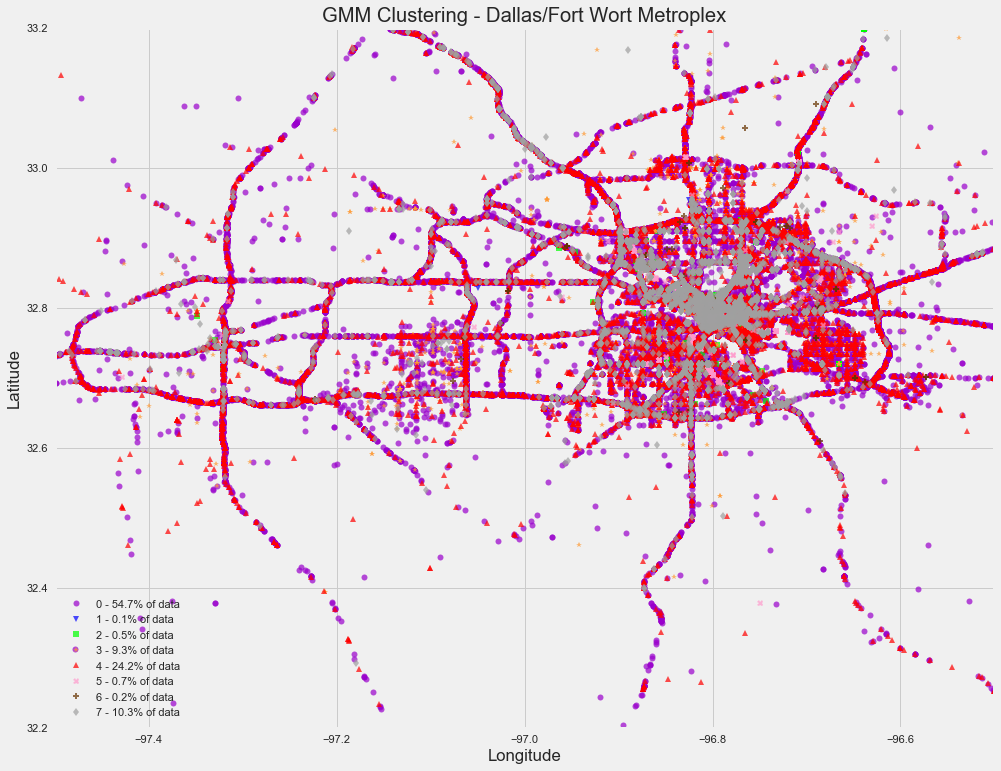

In [30]:
groups = dfw.groupby("cluster")
markers = {0:'o', 1: 'v', 2: 's', 3: '*', 4:'^', 5:'X', 6:'P', 7:'d'}
colors = {0:'#9900cc', 1: '#0000ff', 2: '#00ff00', 3: '#ff9933', 4:'#ff0000', 5:'#ff99cc', 6:'#663300', 7:'#A0A0A0'}
plt.figure(figsize=(15,12))
for name, group in groups:
    label=str(name)+' - '+ str(round(dfw_pct_dict[name][0]*100,1))+'% of data'
    
    plt.plot(group["Start_Lng"], group["Start_Lat"], 
             marker=markers[name], 
             linestyle="", 
             label=label,
             c=colors[name], 
             alpha=.7)

plt.legend(loc=3)
plt.axis(dfw_coordinates)
plt.title('GMM Clustering - Dallas/Fort Wort Metroplex')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Results

GMM created 8 clusterings of Texas accidents. We found 3 meaningful classifications based on those clusters: Highway Accidents, Suburban Accidents, and Urban Accidents.

#### Group 0 - Highway Accidents

The graph of Texas above shows that 48.8% of the accidents can be clustered into Group 0. We can categorize this cluster as follows:

* Occur along major highways
* Higher average severity
* Does not occur near traffic signals or crossings, but does occur near junctions

Thus we can conclude that these are Highway Accidents, occuring on the highway or where junctions occur. These are marginally more severe than other accidents.

#### Groups 3 and 4 - Suburban Accidents

Groups 3 and 4 account for 18.4% and 19.8% of accidents respectively. We can categroize these clusters as follows:

* Do not occur on major highways, unless in rural areas
* Group 3 occurs during the day while Group 4 occurs during the night
* Group 4 accidents are slightly more severe than Group 3
* Group 3 accidents occur at traffic signals at the highest frequency

We recommend combining these groups into one classification: Suburban Accidents. These are accidents occuring in populated areas, but not along highways. Many happen at traffic signals.


#### Group 7 - Urban Accidents

Group 7 accounts for 8.0% of all Texan accidents, but when we zoom into DFW, a major metropolitan area, that number increases to 10.3%. We can categorize this cluster as follows:

* Occur in downtown, urban areas
* High frequency of nearby crossings and traffic signals

We can classify these as Urban Accidents due to their locations and road characteristics.

#### Groups 1, 2, 5, and 6 - Miscellaneous Accidents

Groups 1, 2, 5, and 6 are small, altogether only accounting for 5% of Texas accidents. These clusters may not be meaningful, but we can glean some information from these:

* Group 1 occurs only at stations, including bus and train stations.
* Group 2 may involve pedestrian foot traffic, as they occur near points of interests and crossings where there is no exit for vehicles
* Group 5 occurs only near railways
* Group 6 occurs only near stop signs

## DBScan

The final clustering method will be DBScan. We'll start by building out the initial feature set for the model to use.

In [31]:
# Select the features that will be included in the DBScan clustering approach

featuresList = ['Start_Lat','Start_Lng','Side','Temperature(F)',
                'Humidity(%)','Visibility(mi)','Precipitation(in)',
                'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']



#filter down the dataframe to just the features needed. We'll create a new dataframe just to be safe
df3 = df[featuresList]

In [32]:
# One-hot encoding for two features

cols_to_transform = ['Side','Sunrise_Sunset']
df3 = pd.get_dummies(df3, columns = cols_to_transform)

In this step, we apply standard scaling to our data for use in identifying the optimal number of clusters as a target for our clustering approaches.

In [33]:
# Apply scaling to the data for DBScan

ss = StandardScaler()
X = ss.fit_transform(df3)

We leverage the elbow method plot to identify the optimal number of clusters. Based on the output of the plot, the optimal number of clusters appears to be 8.

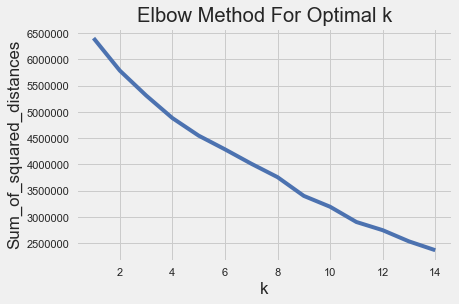

In [34]:
# Create elbow plot for sanity check on number of clusters - this should be the DBScan target

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot the appropriate k cluster size

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In this section, the DBScan model is executed. A parameter setting of EPS = 2.0 was chosen because this epsilon value captures an acceptable neighbor distance for points in a cluster. The min samples of 400 was chosen because our data set does have a decent amount of noise. Moreover, this min_samples value allowed us to create more meaningful clusters based on review and digging into each cluster. 

Note: we did try many variations of both values in an attempt to find meaningful clusters (ranging from eps 0.3 all the way to 2.4). These values of EPS and min_pts produced the best results from a cluster number and contents perspective (contents analysis presented further below). 

Also note: since DBScan does not allow the user to specify the optimal number of clusters, the 8 clusters identified by the elbow method served as a means to target as adjustments were made to both EPS and min_pts. However, DBScan did not approach 8 clusters at any point during our parameter adjustment phase. We realize 23 clusters is quite a lot to take in, however after analyzing the results (further below), we believe these clusters are formed primarily along the lines of accident segmentation within the data set. We have also determined to focus the DBScan clustering analysis on the state of Texas.

Estimated number of clusters: 23


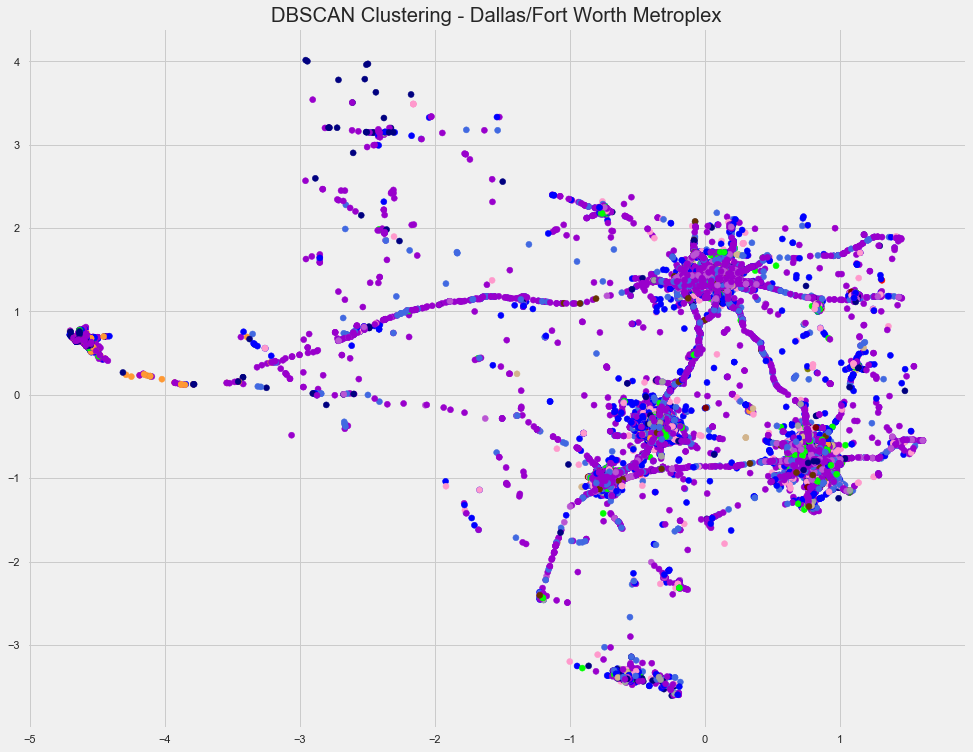

In [35]:
# Perform the DBScan clustering based on pre-determined EPS and min_samples values

eps = 2.0  
min_samples = 400

db = DBSCAN(eps=eps, min_samples=min_samples)

db.fit(X)
y_pred = db.fit_predict(X)
pred_labels = db.labels_

colors = ['#9900cc', '#0000ff', '#00ff00', '#ff9933', '#ff0000', '#ff99cc', '#663300', '#A0A0A0','royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.figure(figsize=(15,12))
plt.scatter(X[:, 1], X[:,0],
            c=vectorizer(pred_labels))
plt.title("DBSCAN Clustering - Dallas/Fort Worth Metroplex")

db_labels = db.labels_
num_clusters = len(set(db_labels))
print('Estimated number of clusters: %d' % num_clusters)

In this step we start building out the cluster data frames to evaluate cluster contents - with this step identifying the number of rows in each cluster.

In [36]:
# Append DBScan clusters back to dataset
df3["cluster"] = pred_labels

# Create DBScan cluster counts
cluster0_cnt = len(df3[pred_labels == 0])
cluster1_cnt = len(df3[pred_labels == 1])
cluster2_cnt = len(df3[pred_labels == 2])
cluster3_cnt = len(df3[pred_labels == 3])
cluster4_cnt = len(df3[pred_labels == 4])
cluster5_cnt = len(df3[pred_labels == 5])
cluster6_cnt = len(df3[pred_labels == 6])
cluster7_cnt = len(df3[pred_labels == 7])
cluster8_cnt = len(df3[pred_labels == 8])
cluster9_cnt = len(df3[pred_labels == 9])
cluster10_cnt = len(df3[pred_labels == 10])
cluster11_cnt = len(df3[pred_labels == 11])
cluster12_cnt = len(df3[pred_labels == 12])
cluster13_cnt = len(df3[pred_labels == 13])
cluster14_cnt = len(df3[pred_labels == 14])
cluster15_cnt = len(df3[pred_labels == 15])
cluster16_cnt = len(df3[pred_labels == 16])
cluster17_cnt = len(df3[pred_labels == 17])
cluster18_cnt = len(df3[pred_labels == 18])
cluster19_cnt = len(df3[pred_labels == 19])
cluster20_cnt = len(df3[pred_labels == 20])
cluster21_cnt = len(df3[pred_labels == 21])

In this step we perform a percentage calculation on the number of rows within each cluster to identify "coverage" across each cluster relative to the entire data set.

In [37]:
# Create DBScan cluster percentiles
cluster0_per = round(len(df3[pred_labels == 0])/len(df3),2)
cluster1_per = round(len(df3[pred_labels == 1])/len(df3),2)
cluster2_per = round(len(df3[pred_labels == 2])/len(df3),2)
cluster3_per = round(len(df3[pred_labels == 3])/len(df3),2)
cluster4_per = round(len(df3[pred_labels == 4])/len(df3),2)
cluster5_per = round(len(df3[pred_labels == 5])/len(df3),2)
cluster6_per = round(len(df3[pred_labels == 6])/len(df3),2)
cluster7_per = round(len(df3[pred_labels == 7])/len(df3),2)
cluster8_per = round(len(df3[pred_labels == 8])/len(df3),2)
cluster9_per = round(len(df3[pred_labels == 9])/len(df3),2)
cluster10_per = round(len(df3[pred_labels == 10])/len(df3),2)
cluster11_per = round(len(df3[pred_labels == 11])/len(df3),2)
cluster12_per = round(len(df3[pred_labels == 12])/len(df3),2)
cluster13_per = round(len(df3[pred_labels == 13])/len(df3),2)
cluster14_per = round(len(df3[pred_labels == 14])/len(df3),2)
cluster15_per = round(len(df3[pred_labels == 15])/len(df3),2)
cluster16_per = round(len(df3[pred_labels == 16])/len(df3),2)
cluster17_per = round(len(df3[pred_labels == 17])/len(df3),2)
cluster18_per = round(len(df3[pred_labels == 18])/len(df3),2)
cluster19_per = round(len(df3[pred_labels == 19])/len(df3),2)
cluster20_per = round(len(df3[pred_labels == 20])/len(df3),2)
cluster21_per = round(len(df3[pred_labels == 21])/len(df3),2)

This step calculates and displays the coverage of the clusters across the dataset and the count of rows contained in each cluster.

In [38]:
# Create and display DBScan cluster results

clusterAll_per = (round(cluster0_per + cluster1_per + cluster2_per + cluster3_per + cluster4_per + cluster5_per + cluster6_per + cluster7_per + cluster8_per + cluster9_per + cluster10_per + cluster11_per + cluster12_per + cluster13_per + cluster14_per + cluster15_per + cluster16_per + cluster17_per + cluster18_per + cluster19_per + cluster20_per + cluster21_per,2)) * 100
    
clusterAll_cnt = cluster0_cnt + cluster1_cnt + cluster2_cnt + cluster3_cnt + cluster4_cnt + cluster5_cnt + cluster6_cnt + cluster7_cnt + cluster8_cnt + cluster9_cnt + cluster10_cnt + cluster11_cnt + cluster12_cnt + cluster13_cnt + cluster14_cnt + cluster15_cnt + cluster16_cnt + cluster17_cnt + cluster18_cnt + cluster19_cnt + cluster20_cnt + cluster21_cnt 

print("Cluster 0:", cluster0_cnt, "rows, ", cluster0_per, "percent of total")
print("Cluster 1:", cluster1_cnt, "rows, ", cluster1_per, "percent of total")
print("Cluster 2:", cluster2_cnt, "rows, ", cluster2_per, "percent of total")
print("Cluster 3:", cluster3_cnt, "rows, ", cluster3_per, "percent of total")
print("Cluster 4:", cluster4_cnt, "rows, ", cluster4_per, "percent of total")
print("Cluster 5:", cluster5_cnt, "rows, ", cluster5_per, "percent of total")
print("Cluster 6:", cluster6_cnt, "rows, ", cluster6_per, "percent of total")
print("Cluster 7:", cluster7_cnt, "rows, ", cluster7_per, "percent of total")
print("Cluster 8:", cluster8_cnt, "rows, ", cluster8_per, "percent of total")
print("Cluster 9:", cluster9_cnt, "rows, ", cluster9_per, "percent of total")
print("Cluster 10:", cluster10_cnt, "rows, ", cluster10_per, "percent of total")
print("Cluster 11:", cluster11_cnt, "rows, ", cluster11_per, "percent of total")
print("Cluster 12:", cluster12_cnt, "rows, ", cluster12_per, "percent of total")
print("Cluster 13:", cluster13_cnt, "rows, ", cluster13_per, "percent of total")
print("Cluster 14:", cluster14_cnt, "rows, ", cluster14_per, "percent of total")
print("Cluster 15:", cluster15_cnt, "rows, ", cluster15_per, "percent of total")
print("Cluster 16", cluster16_cnt, "rows, ", cluster16_per, "percent of total")
print("Cluster 17", cluster17_cnt, "rows, ", cluster17_per, "percent of total")
print("Cluster 18", cluster18_cnt, "rows, ", cluster18_per, "percent of total")
print("Cluster 19", cluster19_cnt, "rows, ", cluster19_per, "percent of total")
print("Cluster 20", cluster20_cnt, "rows, ", cluster20_per, "percent of total")
print("Cluster 21", cluster21_cnt, "rows, ", cluster21_per, "percent of total")

print("Total check", clusterAll_cnt, "rows,", clusterAll_per, "percent of total")

Cluster 0: 110056 rows,  0.38 percent of total
Cluster 1: 29489 rows,  0.1 percent of total
Cluster 2: 32955 rows,  0.11 percent of total
Cluster 3: 7781 rows,  0.03 percent of total
Cluster 4: 2208 rows,  0.01 percent of total
Cluster 5: 7194 rows,  0.02 percent of total
Cluster 6: 3645 rows,  0.01 percent of total
Cluster 7: 9133 rows,  0.03 percent of total
Cluster 8: 34622 rows,  0.12 percent of total
Cluster 9: 2711 rows,  0.01 percent of total
Cluster 10: 2637 rows,  0.01 percent of total
Cluster 11: 10028 rows,  0.03 percent of total
Cluster 12: 11492 rows,  0.04 percent of total
Cluster 13: 959 rows,  0.0 percent of total
Cluster 14: 1349 rows,  0.0 percent of total
Cluster 15: 875 rows,  0.0 percent of total
Cluster 16 543 rows,  0.0 percent of total
Cluster 17 471 rows,  0.0 percent of total
Cluster 18 830 rows,  0.0 percent of total
Cluster 19 2334 rows,  0.01 percent of total
Cluster 20 843 rows,  0.0 percent of total
Cluster 21 448 rows,  0.0 percent of total
Total check 2

This step merges the DBScan cluster labels into dataframes for use in the steps below.

In [39]:
# Create DBScan cluster dataframes
cluster0 = df3[pred_labels == 0]
cluster1 = df3[pred_labels == 1]
cluster2 = df3[pred_labels == 2]
cluster3 = df3[pred_labels == 3]
cluster4 = df3[pred_labels == 4]
cluster5 = df3[pred_labels == 5]
cluster6 = df3[pred_labels == 6]
cluster7 = df3[pred_labels == 7]
cluster8 = df3[pred_labels == 8]
cluster9 = df3[pred_labels == 9]
cluster10 = df3[pred_labels == 10]
cluster11 = df3[pred_labels == 11]
cluster12 = df3[pred_labels == 12]
cluster13 = df3[pred_labels == 13]
cluster14 = df3[pred_labels == 14]
cluster15 = df3[pred_labels == 15]
cluster16 = df3[pred_labels == 16]
cluster17 = df3[pred_labels == 17]
cluster18 = df3[pred_labels == 18]
cluster19 = df3[pred_labels == 19]
cluster20 = df3[pred_labels == 20]
cluster21 = df3[pred_labels == 21]

In [ ]:
export_csv_df = pd.concat([cluster0, cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,cluster21])

In [ ]:
export_csv_df.to_csv('F:/SMU/DS7331/export_csv_df.csv')

To further evaluate individual clusters, we've broken out each cluster into their individual charts and elements. Based on this analysis, there are a few observations that can be made and would serve as jump off points for additional targeted exploration - described below.

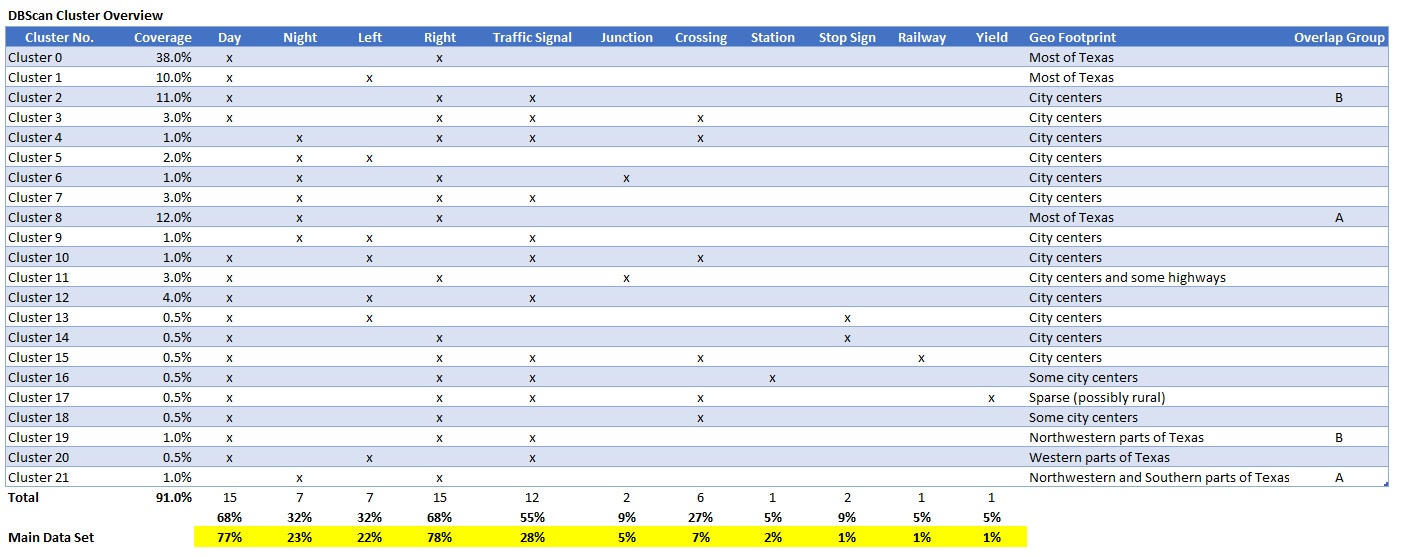

It's worth calling out here that our coverage of certain features with the DBScan approach, such as time of day, side of the road, junction existence, and station existence line up pretty well with the proportions in the main data set itself. From there, DBScan chose to cluster on other elements at a rate that differs from the main data set. This could be attributable to decisions made to limit the number of features we presented to DBScan for efficiency purposes. Either way, this serves as another barometer to measure how well DBScan proportionalized the features across the entirety of the cluster model set. 

Summary statistics for the main data set:

In [40]:
df3.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000,290989.0,290989.000000,290989.000000,290989.000000,290989.000000,290989.000000
mean,30.870549,-97.011495,71.241571,64.199262,9.212907,0.006262,0.018822,0.000179,0.076501,0.005643,0.052514,0.001031,0.009286,0.000038,0.015667,0.014908,0.000381,0.284750,0.0,0.215496,0.784504,0.773820,0.226180,3.277248
std,1.373057,2.035274,15.816361,22.249137,2.186133,0.046259,0.135896,0.013367,0.265799,0.074907,0.223062,0.032092,0.095913,0.006148,0.124185,0.121184,0.019527,0.451296,0.0,0.411167,0.411167,0.418358,0.418358,4.552344
min,25.918209,-106.587378,-40.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,29.744993,-97.719612,60.800000,47.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
50%,30.250745,-96.815544,73.400000,65.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000
75%,32.706440,-95.484650,82.900000,83.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,7.000000
max,36.381987,-93.722137,161.600000,100.000000,111.000000,2.940000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,21.000000


#### Cluster 0

Cluster 0: we observe that it contains 38% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur during the DAY, the RIGHT side of the street, a mean visibility of 9.2 mi (which is inline with the overall data set which contains a mean of 9.2 mi also), and mean values for temperature, humidity, visibility, and precipitation that match up pretty well with the main data set (minus a small variance with precipitation). This cluster, interestingly, covers much of the state of Texas and does not appear to be specific to any one city center.

Conclusion - this cluster, minus the sunsrise / sunset and side observations noted above, tends to (at least looking at the mean) parallel the main dataset. This may be useful for governments / first-responders to sample alternative to looking at the entire data set - for DAYTIME accidents occuring on the RIGHT side of the street in these geographical areas.

In [41]:
cluster0.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,110056.000000,110056.000000,110056.000000,110056.000000,110056.000000,110056.000000,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0,110056.0
mean,31.039627,-97.024938,73.218935,61.618976,9.278688,0.003541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
std,1.427160,1.969285,15.776115,22.206118,2.083978,0.014888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,25.924540,-106.582920,14.000000,4.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25%,29.767730,-97.702263,63.000000,44.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
50%,30.311397,-96.827461,75.900000,62.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
75%,32.758941,-95.531625,84.900000,81.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
max,35.731153,-93.722137,140.000000,100.000000,15.000000,0.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Cluster 1

Cluster 1: we observe that it contains 10% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur during the DAY, the LEFT side of the street, a mean visibility of 9.2 mi (which is inline with the overall data set which contains a mean of 9.2 mi also), and mean values for temperature, humidity, visibility, and precipitation that match up pretty well with the main data set (minus a small variance with precipitation). This cluster also covers a relatively large portion of Texas and does not appear to be specific to any one city center.

Conclusion - this cluster, minus the sunsrise / sunset and side observations noted above, tends to (at least looking at the mean) parallel the main dataset. This may be useful for governments / first-responders to sample alternative to looking at the entire data set - for DAYTIME accidents occuring on the LEFT side of the street. Cluster 1 seems to differ from cluster 0 primarily based on the side of the street feature in these geographical areas.

In [42]:
cluster1.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,29489.000000,29489.000000,29489.000000,29489.000000,29489.000000,29489.000000,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0,29489.0
mean,30.525494,-97.326312,73.375320,61.515921,9.214270,0.002743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
std,1.145079,2.389605,15.421113,22.699902,2.077998,0.010202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,25.932783,-106.587378,15.800000,4.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
25%,29.729940,-97.769806,63.000000,44.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
50%,30.221048,-97.529999,75.900000,62.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
75%,30.440557,-95.500397,84.900000,81.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
max,35.444546,-93.905340,136.400000,100.000000,13.000000,0.180000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


#### Cluster 2

Looking at cluster 2 we observe that it contains 11% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur during the DAY, the RIGHT side of the street, all accidents had a TRAFFIC SIGNAL near by, a mean visibility of 9.2 mi and mean values for temperature, humidity (slightly higher than the main data set - possibly a function of the latitude longitude chosen for this cluster), visibility, and precipitation that match up pretty well with the main data set. 

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the DAYTIME on the RIGHT side of the street where a TRAFFIC SIGNAL was nearby in these geographical areas.

In [43]:
cluster2.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,32955.000000,32955.000000,32955.000000,32955.000000,32955.000000,32955.000000,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0,32955.0
mean,30.495414,-96.686790,73.722343,62.821453,9.228404,0.002826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
std,1.219558,1.166417,15.180088,21.352201,2.104637,0.010918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,26.198324,-101.923233,15.800000,4.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
25%,29.714890,-97.730980,64.000000,46.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
50%,29.939072,-96.781036,75.900000,63.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
75%,30.407816,-95.483090,84.900000,81.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
max,33.982479,-94.697418,136.400000,100.000000,13.000000,0.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


#### Cluster 3

Looking at cluster 3 we observe that it contains 3% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur during the DAY, the RIGHT side of the street, all accidents had a TRAFFIC SIGNAL near by,  a CROSSING nearby (rail, pedestrian), and mean values for temperature, humidity (slightly higher than the main data set - possibly a function of the latitude longitude chosen for this cluster), visibility, and precipitation that match up pretty well with the main data set. 

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the DAYTIME on the RIGHT side of the street where a TRAFFIC SIGNAL and CROSSING was nearby in these geographical areas.

In [44]:
cluster3.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0,7781.0
mean,31.031362,-96.299131,73.553541,61.719959,9.279726,0.002558,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
std,1.458292,0.921423,15.290503,20.649999,1.990298,0.009317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.380280,-98.716339,18.000000,9.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
25%,29.761337,-96.818878,64.000000,46.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
50%,30.067844,-96.756508,76.000000,62.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
75%,32.803030,-95.410919,84.900000,78.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
max,33.871265,-95.095398,122.000000,100.000000,13.000000,0.180000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0


#### Cluster 4

Looking at cluster 4 we observe that it contains 1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT, the RIGHT side of the street, all accidents had a TRAFFIC SIGNAL near by,  a CROSSING nearby (rail, pedestrian), and mean values that are lower for temperature and precipitation, but higher for humidity, visibility than the main data set. 

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the NIGHT on the RIGHT side of the street where a TRAFFIC SIGNAL and CROSSING was nearby in these geographical areas.

In [45]:
cluster4.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0,2208.0
mean,31.347886,-96.366635,65.348324,69.446105,9.514855,0.002550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
std,1.485764,0.848868,14.594352,19.008352,1.521862,0.007506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.330175,-98.715607,18.000000,15.000000,1.800000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
25%,29.817192,-96.821938,54.750000,56.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
50%,30.446850,-96.774368,68.000000,72.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
75%,32.822197,-95.429428,77.000000,84.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
max,33.871136,-94.344200,98.100000,100.000000,13.000000,0.120000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0


#### Cluster 5

Looking at cluster 5 we observe that it contains 2% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT, the LEFT side of the street and mean values that are lower for temperature, and visbility, but higher for humidity and precipitation.

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the NIGHT on the LEFT side of the street in these geographical areas.

In [46]:
cluster5.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0,7194.0
mean,30.650571,-96.815464,64.713622,73.559911,9.143682,0.002997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
std,1.264335,1.125174,14.262085,19.365217,2.187266,0.009892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,26.107716,-103.645530,11.300000,9.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
25%,29.738150,-97.730116,54.025000,60.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
50%,30.223450,-96.871399,66.900000,78.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
75%,30.493548,-95.503100,75.900000,90.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
max,35.659296,-93.903313,100.400000,100.000000,13.000000,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0


#### Cluster 6

Looking at cluster 6 we observe that it contains 1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT, the RIGHT side of the street with a JUNCTION present, and mean values that are lower for temperature, and precipitation, but higher for humidity and visibility.

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the NIGHT on the RIGHT side of the street with a JUNCTION present in these geographical areas.

In [47]:
cluster6.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0,3645.0
mean,31.356386,-96.495786,63.039698,73.455693,9.399122,0.003158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
std,1.512971,0.939530,14.816208,18.825504,1.748937,0.009950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,27.571163,-99.769997,14.900000,9.000000,1.800000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
25%,29.776737,-96.906084,52.000000,60.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
50%,32.632549,-96.754488,64.900000,77.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
75%,32.794098,-95.422330,75.000000,89.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
max,33.726290,-94.724037,98.000000,100.000000,13.000000,0.140000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0


#### Cluster 7

Looking at cluster 7 we observe that it contains 3% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT, the RIGHT side of the street with a TRAFFIC SIGNAL present, and mean values that are lower for temperature, visbility, and precipitation but higher for humidity.

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the NIGHT on the RIGHT side of the street with a TRAFFIC SIGNAL present in these geographical areas.

In [48]:
cluster7.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0,9133.0
mean,30.723671,-96.699440,64.475693,73.701850,9.176364,0.003078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0
std,1.353044,1.109729,14.031302,18.963278,2.206861,0.009676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,25.949141,-101.848549,12.900000,13.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0
25%,29.724918,-97.704391,54.000000,61.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0
50%,30.186716,-96.789093,66.200000,78.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0
75%,32.698341,-95.501030,75.200000,89.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0
max,35.176739,-94.129402,102.000000,100.000000,13.000000,0.140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0


#### Cluster 8

Looking at cluster 8 we observe that it contains 12% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT, the RIGHT side of the street and mean values that are lower for temperature, visbility, and precipitation but higher for humidity.

Conclusion - may be useful for governments / first-responders to look for accidents occurring in the NIGHT on the RIGHT side of the street in these geographical areas.

In [49]:
cluster8.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,34622.000000,34622.000000,34622.000000,34622.000000,34622.000000,34622.000000,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0,34622.0
mean,31.187651,-96.704457,63.136532,73.785541,9.159527,0.004059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
std,1.479317,1.032299,14.692605,19.085345,2.207327,0.014482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,25.961201,-103.831673,12.200000,9.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
25%,29.774414,-97.503081,52.200000,61.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
50%,30.358213,-96.813588,64.900000,78.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
75%,32.778814,-95.527489,75.000000,89.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
max,35.233711,-93.733086,102.200000,100.000000,13.000000,0.180000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0


#### Cluster 9

Looking at cluster 9 we observe that it contains 1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT, the LEFT side of the street with a TRAFFIC SIGNAL present and mean values that are lower for temperature, and precipitation but higher for humidity and visibility.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the NIGHT on the LEFT side of the street with a TRAFFIC SIGNAL present in these geographical areas.

In [50]:
cluster9.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0,2711.0
mean,30.470442,-96.774477,65.601402,72.412394,9.495795,0.002353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0
std,1.159577,1.154482,13.976156,19.113131,1.490998,0.007146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.124701,-98.774635,15.100000,9.000000,1.800000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0
25%,29.724235,-97.750099,55.900000,60.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0
50%,30.172462,-96.829460,68.000000,76.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0
75%,30.397640,-95.514084,75.900000,88.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0
max,33.912369,-94.726501,100.000000,100.000000,13.000000,0.140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0


#### Cluster 10

Looking at cluster 10 we observe that it contains 1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the LEFT side of the street with a TRAFFIC SIGNAL and CROSSING present and mean values that are lower for humidity, and precipitation but higher for temperature and visibility.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the LEFT side of the street with a TRAFFIC SIGNAL and CROSSING present in these geographical areas.

In [51]:
cluster10.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0,2637.0
mean,30.897667,-96.398287,74.945165,59.777778,9.523512,0.002192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0
std,1.389111,0.965648,14.576644,19.709901,1.450765,0.007107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.262460,-98.715530,21.900000,9.000000,2.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0
25%,29.757341,-96.873848,66.200000,44.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0
50%,30.264978,-96.770729,77.000000,60.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0
75%,32.782791,-95.409897,86.000000,75.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0
max,33.185230,-94.833800,109.000000,100.000000,13.000000,0.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0


#### Cluster 11

Looking at cluster 11 we observe that it contains 3% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a JUNCTION present and mean values that are lower for humidity, and precipitation but higher for temperature and visibility.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a JUNCTION present in these geographical area

In [52]:
cluster11.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,10028.000000,10028.000000,10028.000000,10028.000000,10028.000000,10028.000000,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0,10028.0
mean,31.274120,-96.509380,73.637984,61.396590,9.415838,0.002843,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0
std,1.505579,0.978434,15.647240,21.448726,1.994953,0.010231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,26.218240,-102.535620,17.600000,9.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0
25%,29.777280,-97.005660,64.000000,44.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0
50%,30.348212,-96.751970,76.000000,61.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0
75%,32.794098,-95.425570,85.000000,79.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0
max,33.956110,-93.728140,109.900000,100.000000,13.000000,0.170000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0


#### Cluster 12

Looking at cluster 12 we observe that it contains 4% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the LEFT side of the street with a TRAFFIC SIGNAL present and mean values that are lower for humidity, visibility, and precipitation but higher for temperature.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the LEFT side of the street with a TRAFFIC SIGNAL present in these geographical areas.

In [53]:
cluster12.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0,11492.0
mean,30.344464,-96.802818,74.200914,62.402019,9.235508,0.002697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
std,1.048095,1.185638,15.124139,21.280553,2.069775,0.010275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,26.179466,-99.845660,18.000000,11.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
25%,29.720352,-97.767899,64.400000,46.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
50%,29.997547,-96.863983,77.000000,62.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
75%,30.366069,-95.493690,85.500000,80.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
max,33.914085,-94.103065,122.000000,100.000000,15.000000,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0


#### Cluster 13

Looking at cluster 13 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the LEFT side of the street with a STOP SIGN present and mean values that are lower for precipitation but higher for temperature, visiblity, and humidity.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the LEFT side of the street with a STOP SIGN present in these geographical areas.

In [54]:
cluster13.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0
mean,29.848230,-95.680061,74.389364,64.342023,9.277894,0.002200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
std,0.350443,0.799691,13.528119,20.013613,1.517879,0.007386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.334431,-98.704704,26.600000,10.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
25%,29.742744,-95.504104,66.200000,50.000000,9.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
50%,29.805340,-95.401520,77.000000,65.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
75%,29.851936,-95.370914,84.200000,80.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
max,32.930828,-95.206039,100.000000,100.000000,10.000000,0.090000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0


#### Cluster 14

Looking at cluster 14 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a STOP SIGN present and mean values that are lower for precipitation but higher for temperature, visiblity, and humidity.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a STOP SIGN present in these geographical areas.

In [55]:
cluster14.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0
mean,29.954017,-95.680898,73.176205,64.196442,9.213121,0.002298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
std,0.622149,0.766543,14.038041,19.941512,1.721952,0.007512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.351870,-98.711143,24.800000,12.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
25%,29.747650,-95.476562,64.400000,49.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
50%,29.810635,-95.397079,75.200000,65.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
75%,29.861740,-95.373367,84.000000,81.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0
max,32.971390,-94.742912,101.000000,100.000000,10.000000,0.110000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0


#### Cluster 15

Looking at cluster 15 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a TRAFFIC SIGNAL, RAILWAY nearby, and a CROSSING present and mean values that are lower for precipitation but higher for temperature, visiblity, and humidity.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a RAILWAY nearby, TRAFFIC SIGNAL, and CROSSING present in these geographical areas.

In [56]:
cluster15.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0
mean,30.078933,-95.714361,74.438629,64.345143,9.392000,0.002206,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15.0
std,0.959086,0.795811,12.969505,19.480019,1.397343,0.007368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.392441,-98.528427,24.800000,17.000000,3.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15.0
25%,29.684992,-95.463768,67.500000,49.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15.0
50%,29.730892,-95.385101,77.000000,65.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15.0
75%,29.828321,-95.349861,82.900000,81.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15.0
max,33.008945,-95.117893,100.400000,100.000000,10.000000,0.110000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15.0


#### Cluster 16

Looking at cluster 16 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a TRAFFIC SIGNAL and a STATION (subway / bus) present and mean values that are lower for precipitation and humidity but higher for temperature and visibility.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a TRAFFIC SIGNAL and STATION present in these geographical areas.

In [57]:
cluster16.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0
mean,30.154240,-97.211561,77.321915,57.469613,9.797422,0.001436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,16.0
std,0.361769,0.995202,13.608420,19.193771,0.718388,0.003908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.343712,-98.617821,33.100000,14.000000,5.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,16.0
25%,29.787373,-97.746864,68.000000,43.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,16.0
50%,30.235289,-97.723808,79.000000,56.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,16.0
75%,30.323515,-97.659180,87.800000,74.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,16.0
max,32.749432,-95.367836,102.900000,97.000000,10.000000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,16.0


#### Cluster 17

Looking at cluster 17 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a TRAFFIC SIGNAL, YIELD section, and a CROSSING present and mean values that are lower for precipitation, visibility, and humidity but higher for temperature.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a TRAFFIC SIGNAL, YIELD sign, and a CROSSING present in these geographical areas.

In [58]:
cluster17.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0
mean,29.870791,-95.571715,75.290234,63.118896,9.677282,0.001868,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17.0
std,0.155524,0.636590,13.216501,19.540430,0.935070,0.005790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.435673,-98.710396,37.000000,18.000000,5.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17.0
25%,29.790005,-95.412697,66.900000,48.000000,10.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17.0
50%,29.869806,-95.407852,78.100000,63.000000,10.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17.0
75%,29.915033,-95.390488,84.200000,79.000000,10.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17.0
max,30.449812,-94.899050,98.100000,100.000000,10.000000,0.090000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17.0


#### Cluster 18

Looking at cluster 18 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a CROSSING present and mean values that are lower for precipitation and humidity but higher for visibility and temperature.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a CROSSING present in these geographical areas.

In [59]:
cluster18.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0
mean,31.251490,-96.732034,76.850241,57.173494,9.843373,0.001470,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0
std,1.372147,0.896130,13.392303,18.774679,0.597177,0.005058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.448647,-98.649811,37.000000,9.000000,6.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0
25%,30.065805,-97.700195,68.000000,43.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0
50%,30.336540,-96.790726,78.900000,57.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0
75%,32.784016,-95.610997,87.100000,72.000000,10.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0
max,32.924667,-95.173203,103.000000,100.000000,10.000000,0.060000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0


#### Cluster 19

Looking at cluster 19 we observe that it contains 1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the RIGHT side of the street with a TRAFFIC SIGNAL present and mean values that are lower for precipitation and humidity but higher for visibility and temperature.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the RIGHT side of the street with a TRAFFIC SIGNAL present in these geographical areas. We also observed that this cluster overlaps with features from cluster 2. Whereas cluster 2 covers a broad portion of Texas, cluster 19 covers a more geographically isolated region in the Northwest portion of the state. Likely attributed to EPS / min-points settings, this could still be an interesting cluster due to the temperature, visibility, humidit, and percipitation differences between both clusters.

In [60]:
cluster19.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0,2334.0
mean,31.764848,-106.344197,73.440446,31.184233,9.820051,0.001474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.0
std,0.046391,0.095440,16.059564,19.035496,0.866686,0.004870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,30.893944,-106.573260,30.000000,4.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.0
25%,31.741184,-106.395196,61.000000,17.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.0
50%,31.766373,-106.332603,75.000000,27.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.0
75%,31.782700,-106.301758,87.100000,41.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.0
max,31.940954,-102.884521,105.100000,100.000000,10.000000,0.110000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.0


#### Cluster 20
Looking at cluster 20 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at DAY, the LEFT side of the street with a TRAFFIC SIGNAL present and mean values that are lower for precipitation and humidity but higher for visibility and temperature.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the DAY on the LEFT side of the street with a TRAFFIC SIGNAL present in these geographical areas.

In [61]:
cluster20.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0,843.0
mean,31.759164,-106.353569,72.398814,30.798339,9.855279,0.001720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0
std,0.039708,0.079110,15.721584,18.093178,0.704873,0.004441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,31.506636,-106.494820,32.000000,4.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0
25%,31.741890,-106.425511,59.000000,18.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0
50%,31.762470,-106.325272,73.000000,27.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0
75%,31.777605,-106.291916,86.000000,41.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0
max,31.936120,-106.153320,105.100000,97.000000,10.000000,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0


#### Cluster 21

Looking at cluster 21 we observe that it contains ~1% of all records. Some of the immediate observations include: all accidents chosen for this cluster occur at NIGHT and the RIGHT side of the street and mean values that are lower for precipitation, temperature, and humidity but higher for visibility.

Conclusion - may be useful for governments / first-responders to both filter and prepare for accidents occurring in the NIGHT on the RIGHT side of the street present in these geographical areas. Cluster 8 also shares the same feature observations as this cluster, however this cluster appears to contain more geogreaphically isolated areas such as to the Northwestern and Southern parts of Texas, compared to cluster 8 which is spread across most of the state.

In [62]:
cluster21.describe()

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,cluster
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0
mean,31.740369,-106.305643,62.667634,42.015625,9.935268,0.001384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0
std,0.132505,0.311800,14.871633,20.780998,0.393239,0.003521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,31.035800,-106.582690,30.000000,6.000000,7.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0
25%,31.734569,-106.429541,52.000000,26.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0
50%,31.764989,-106.346977,62.100000,39.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0
75%,31.784336,-106.294792,73.900000,56.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0
max,31.960360,-103.557114,95.000000,94.000000,10.000000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0


In this section, we plot individual clusters to identify any visual patterns and/or similarities. Findings are combined above with the individual cluster element discussions.

Text(0.5, 1.0, 'Cluster 21')

<Figure size 432x288 with 0 Axes>

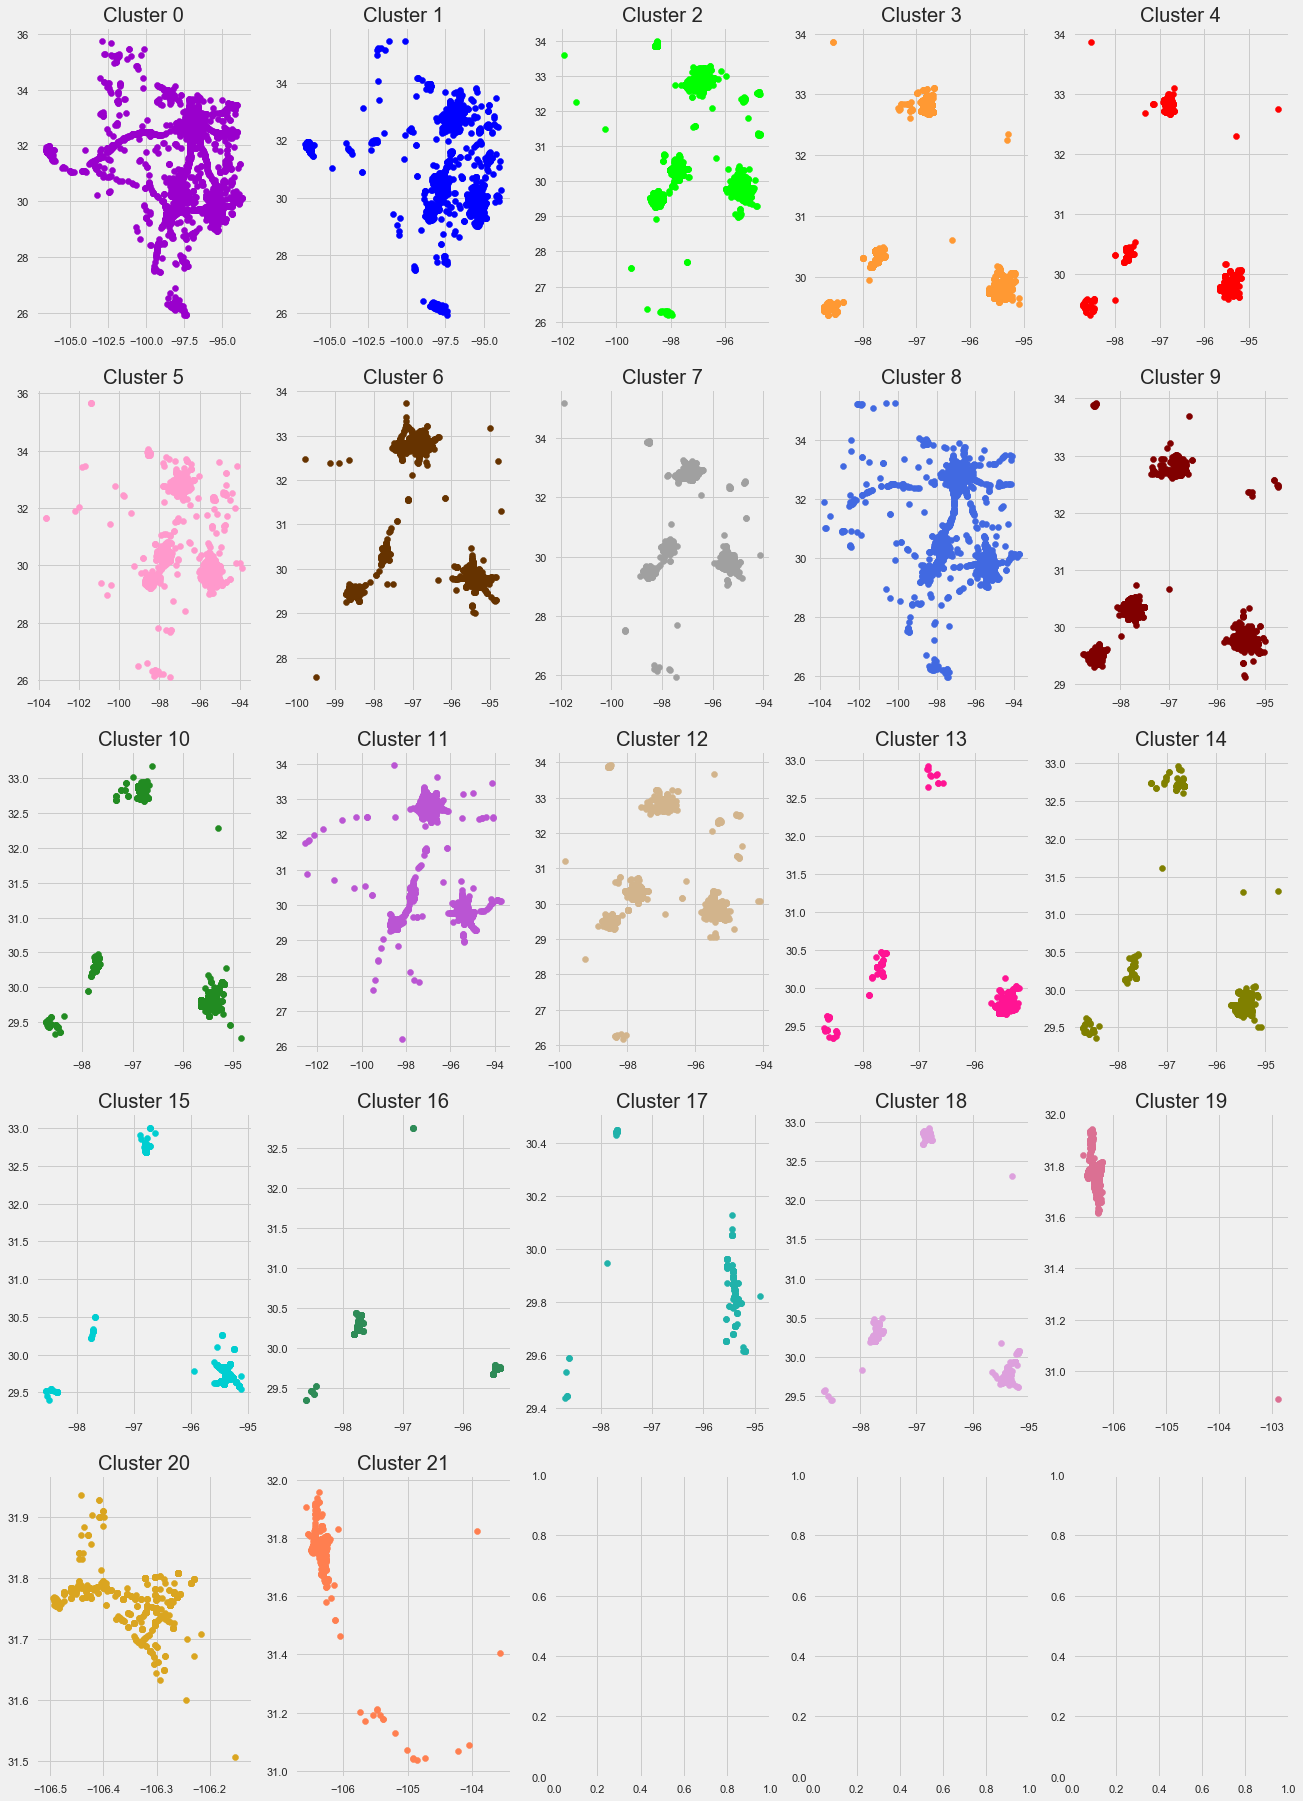

In [63]:
# Create individual DBScan cluster plots
fig = plt.figure()    
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 30))

# row 1
axes[0,0].scatter(cluster0.iloc[:, 1], cluster0.iloc[:,0], c='#9900cc')
axes[0,0].set_title("Cluster 0")

axes[0,1].scatter(cluster1.iloc[:, 1], cluster1.iloc[:,0], c='#0000ff')
axes[0,1].set_title("Cluster 1")

axes[0,2].scatter(cluster2.iloc[:, 1], cluster2.iloc[:,0], c='#00ff00')
axes[0,2].set_title("Cluster 2")

axes[0,3].scatter(cluster3.iloc[:, 1], cluster3.iloc[:,0], c='#ff9933')
axes[0,3].set_title("Cluster 3")

axes[0,4].scatter(cluster4.iloc[:, 1], cluster4.iloc[:,0], c='#ff0000')
axes[0,4].set_title("Cluster 4")

# row 2
axes[1,0].scatter(cluster5.iloc[:, 1], cluster5.iloc[:,0], c='#ff99cc')
axes[1,0].set_title("Cluster 5")

axes[1,1].scatter(cluster6.iloc[:, 1], cluster6.iloc[:,0], c='#663300')
axes[1,1].set_title("Cluster 6")

axes[1,2].scatter(cluster7.iloc[:, 1], cluster7.iloc[:,0], c='#A0A0A0')
axes[1,2].set_title("Cluster 7")

axes[1,3].scatter(cluster8.iloc[:, 1], cluster8.iloc[:,0], c='royalblue')
axes[1,3].set_title("Cluster 8")

axes[1,4].scatter(cluster9.iloc[:, 1], cluster9.iloc[:,0], c='maroon')
axes[1,4].set_title("Cluster 9")

# row 3
axes[2,0].scatter(cluster10.iloc[:, 1], cluster10.iloc[:,0], c='forestgreen')
axes[2,0].set_title("Cluster 10")

axes[2,1].scatter(cluster11.iloc[:, 1], cluster11.iloc[:,0], c='mediumorchid')
axes[2,1].set_title("Cluster 11")

axes[2,2].scatter(cluster12.iloc[:, 1], cluster12.iloc[:,0], c='tan')
axes[2,2].set_title("Cluster 12")

axes[2,3].scatter(cluster13.iloc[:, 1], cluster13.iloc[:,0], c='deeppink')
axes[2,3].set_title("Cluster 13")

axes[2,4].scatter(cluster14.iloc[:, 1], cluster14.iloc[:,0], c='olive')
axes[2,4].set_title("Cluster 14")

# row 4
axes[3,0].scatter(cluster15.iloc[:, 1], cluster15.iloc[:,0], c='darkturquoise')
axes[3,0].set_title("Cluster 15")

axes[3,1].scatter(cluster16.iloc[:, 1], cluster16.iloc[:,0], c='seagreen')
axes[3,1].set_title("Cluster 16")

axes[3,2].scatter(cluster17.iloc[:, 1], cluster17.iloc[:,0], c='lightseagreen')
axes[3,2].set_title("Cluster 17")

axes[3,3].scatter(cluster18.iloc[:, 1], cluster18.iloc[:,0], c='plum')
axes[3,3].set_title("Cluster 18")

axes[3,4].scatter(cluster19.iloc[:, 1], cluster19.iloc[:,0], c='palevioletred')
axes[3,4].set_title("Cluster 19")

# row 5
axes[4,0].scatter(cluster20.iloc[:, 1], cluster20.iloc[:,0], c='goldenrod')
axes[4,0].set_title("Cluster 20")

axes[4,1].scatter(cluster21.iloc[:, 1], cluster21.iloc[:,0], c='coral')
axes[4,1].set_title("Cluster 21")

#### DBScan Conclusion

DBScan returned relevant clusters based primarily the existence of (or non-existence) of time of day, traffic and signage features, and variances due to weather and geography. Comparing these clusters back to the main data set did show some similarities with regard to weather conditions, and one cluster in particular (cluster 0 and cluster 1) which represented much of the main data set's properties. 

All that said, dialing in an appropriate number of clusters using the epsilon and minimum points value was a challenge and likely leaves a lot open to decisions made by the modeller. Moreover, compared to approaches like k-means where one can specify the appropriate number of clusters (with the aid of an elbow plot for example), DBScan relies solely on the input of those two parameters mentioned above. 

Given that, we feel these clusters do serve as a solid jump off point for additional deeper analysis into specific regions and/or needs due to the prevlenance of certain traffic features (stop signs, stations, etc.) within certain regions. Moreover, we feel cities and state government planners could use this information to further analyze if these traffic elements may contribute to or reduce the frequency of accidents in specific regions - combined with weather effects. Future enhancements could include either further condensing the data set down into city-specific looks and/or expanding the parameter values to cluster more of the more geographically isolated areas into the same cluster (doing so however would affect other existing clusters and may not be desirable). 

### Overall Clustering Conclusion

In evaluating the three clustering models (K-Means, Gaussian and DBScan), we see that all methods provided similar results. All models allowed us to quicky see the data clustered on accident locations (highway, suburban, urban). All three models had roughly the same cluster information, however DBScan provided additional clusters that allowed us to see more accident details within the clusters. This is one of the drawbacks with K-Means and Gaussian, in that the number of clusters must be determined up front. 

Through the modelling process we continued to see that K-Means and Gaussian were the quicker performing clustering algorithms while DBScan was extremely computationaly intensive. Given the similarities between all the models we believe that the K-Means or Gaussian models would be extremley appropriate for quickly clustering the data and provide enough insight to make further analysis quick. DBScan could be used to as a tool for a deeper dive into the data. 

## Deployment - 10pts

With respect to model deployment there could be two ways deployment of this model could be achieved:

#### National View
Given that data exists for 49 US states, a representative US model could be deployed for various federal government agencies and first responders (such as ambulance companies). This information could allow them to understand potential impacts that could occur to interstate commerce through accidents that occur on interstates. It could also help first responding agencies allocate appropriate resources nationally in regions with higher accident severity ratings and appropriately staff based on predicted severity in specific locations. It could also help agencies plan the location and placement of emergency facilities within regions where accidents are predicted to more commonly occur while also factoring in traffic impacts from these accidents. In order to build a more robust and actionable model however, we'd likely need more (and more current) data to filter down to just accidents that occurred on interstates.

The other national implication for a model like this would be to feed into government standards. Traffic safety standard developments could utilize a model such as this. Understanding the impacts of accidents and augmenting this model with vehicle information such as year/make/model additional safety standards could be put into place to ensure driver safety. Agencies such as the National Transportation Safety Board could use this data to set regulations on specific road and highway signage and/or construction regulations to avoid those elements that could be contributing to more severe accidents.

Measurable impacts at the national level may be difficult to quantify. If the model were used for safety standards then once the model was put in place trends on traffic accidents could be measured to see if the model had an impact. This would still be difficult to measure in that may other factors may influence that metric outside of the model.

#### State/Local View
The more practical application of this model would be at the state/local level. This is the reason for shifting to Texas state level modeling for this exercise. With the information that's available from this model, state and local first responders could use this information to address future staffing requirements based on weather predictions. We've been able to show that the models do take weather conditions into account and thus we could measure this impact through staffing level changes based on weather.

We've also shown that the distance models provide a good indicator of traffic impacts due to accidents. This can also play into staffing and positioning of local resources. Incorporating additional geographic information into the model, first responders should be able to understand the implications of getting to an accident and how that accident accessibility could be impacted. This could provide key information dispatchers to direct first responders to accidents. Measuring first responder response times would be a metric utilized to determine if the model is effective.
From a city planning perspective, this model may also be useful in determining how close to build station for first responders. Granted we are just looking at traffic incidents and first responders deal with many more incident types, however this model could be another input into that planning methodology.

State agencies could also use these models during city planning and expansion deliberations. Knowing which features contribute to more severe accidents, these agencies could work to identify which of those are within their pervue and design around those implications. Examples would including predictions of severe incidents on the Left vs. Right side of the road may provide valuable to these planning discussions.

## Exceptional Work - 10pts

### Additional Visualizations

For additional visualizations of the data, the team also continued to build out a Power BI dashboard. In this dashboard iteration the clusters generated by the clustering algorithms are mapped based on the latitude and longitude information provided in the data set. This visualization allows the reviewer to see more precisely how the data clustered around highways, rural areas and suburban areas. 

This dashboard allows the user to gain some interactivity with the data to look for specific trends that they may want to focus on outside of what has been modeled here.

The dashboard is embedded below for interactivity within the notebook and can be accessed at: https://app.powerbi.com/view?r=eyJrIjoiZWE4NjllMWEtZTA5YS00MGY0LWIxYzEtNzFjYWE0NGUwNjFkIiwidCI6IjFlZmEzZTljLTY1ZWItNGM5Ny05ZjZiLTQxNWViZGYwOTI1OCIsImMiOjN9

For the embedded version it is best executed in full screen mode to provide the user with more interactivity.

In [64]:
%%html
<iframe width="800" height="600" src="https://app.powerbi.com/view?r=eyJrIjoiZWE4NjllMWEtZTA5YS00MGY0LWIxYzEtNzFjYWE0NGUwNjFkIiwidCI6IjFlZmEzZTljLTY1ZWItNGM5Ny05ZjZiLTQxNWViZGYwOTI1OCIsImMiOjN9" frameborder="0" allowFullScreen="true"></iframe>